In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
#from KaggleAux import predict as ka # see github.com/agconti/kaggleaux for more details

In [11]:
df = pd.read_csv("C:\\Users\\Suyash\\Downloads\\train.csv")

In [12]:
df = df.drop(['Ticket','Cabin'], axis=1)
# Remove NaN values
df = df.dropna()

In [13]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

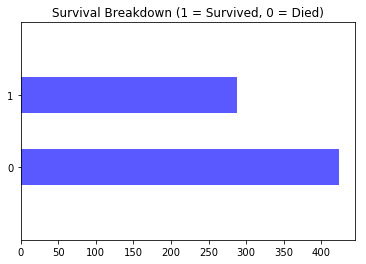

In [14]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(df.Survived.value_counts())) 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")


(-1, 2)

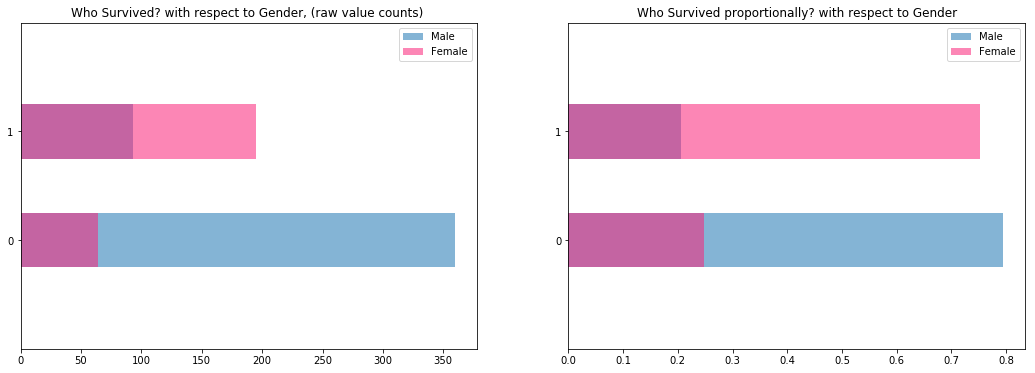

In [15]:
fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

Observations -->
Females have higher chance of survival compared to male. The first graph depicts in numbers and second graph depicts proportion of survival, It is shown in graph that female survival rate is much more compared to males

In [16]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

# building on the previous code, here we create an additional subset with in the gender subset 
# we created for the survived variable. I know, thats a lot of subsets. After we do that we call 
# value_counts() so it it can be easily plotted as a bar graph. this is repeated for each gender 
# class pair.
ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass == 1].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass == 1].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

Almost 90-95% of females of high class were able to survive. Females coming from lower class have almost equal probability of surviving and death. Majority of people who died in disaster belong to male in low class category, The graph depicts that number of people dead vastly outnumber number of people surviving for case of male,low class.

In [43]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(161)
children = df.Survived[df.Age <= 18].value_counts()
children.plot(kind='bar', label='children', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(children))
plt.title("Children(less than 18 years) Survived"); plt.legend(loc='best')

ax2=fig.add_subplot(162,sharey=ax1)
old = df.Survived[df.Age >= 50].value_counts()
old.plot(kind='bar', label='old', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Survived", "Died"], rotation=0)
ax2.set_xlim(-1, len(old))
plt.title("Elder people Survived"); plt.legend(loc='best')

ax3=fig.add_subplot(163,sharey=ax1)
adult = df.Survived[df.Age < 50][df.Age > 18].value_counts()
adult.plot(kind='bar', label='old', color='steelblue', alpha=alpha_level)
ax3.set_xticklabels(["Survived", "Died"], rotation=0)
ax3.set_xlim(-1, len(adult))
plt.title("Adult Survived"); plt.legend(loc='best')


The above graph shows that survival rate in case of children were almost equal to death rate. So lots of children were killed in disaster. Similarly for people above 50 years of age the survival rate improves and is almost 1.5 times that people died. In case of Adult population, survival rate was about 30-40% more than death rate.

In [44]:
fig = plt.figure(figsize=(18,5), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(151)
children = df.Survived[df.Age <= 18][df.Sex == 'female'].value_counts()
children.plot(kind='bar', label='children', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(children))
plt.title("Girls(less than 18 years) Survived"); plt.legend(loc='best')

ax2=fig.add_subplot(152,sharey=ax1)
old = df.Survived[df.Age >= 50][df.Sex == 'female'].value_counts()
old.plot(kind='bar', label='old', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Survived", "Died"], rotation=0)
ax2.set_xlim(-1, len(old))
plt.title("Elder women Survived"); plt.legend(loc='best')

ax3=fig.add_subplot(153,sharey=ax1)
adult = df.Survived[df.Age < 50][df.Age > 18][df.Sex == 'female'].value_counts()
adult.plot(kind='bar', label='old', color='steelblue', alpha=alpha_level)
ax3.set_xticklabels(["Survived", "Died"], rotation=0)
ax3.set_xlim(-1, len(adult))
plt.title("Adult Female Survived"); plt.legend(loc='best')

ax4=fig.add_subplot(154,sharey=ax1)
children = df.Survived[df.Age <= 18][df.Sex == 'male'].value_counts()
children.plot(kind='bar', label='children', color='#FA2479', alpha=alpha_level)
ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(children))
plt.title("Boys(less than 18 years) Survived"); plt.legend(loc='best')

ax5=fig.add_subplot(155,sharey=ax1)
old = df.Survived[df.Age > 18][df.Sex == 'male'].value_counts()
old.plot(kind='bar', label='old', color='pink', alpha=alpha_level)
ax5.set_xticklabels(["Survived", "Died"], rotation=0)
ax5.set_xlim(-1, len(old))
plt.title("Elder men Survived"); plt.legend(loc='best')


Girls less than 18 years have 70% chance of survival than death. For adult female the survival rate improves considerably and survival of adult female is almost double of death. Similarly survival rate of adult men are higher than survival rate of boys under 18 years of age.

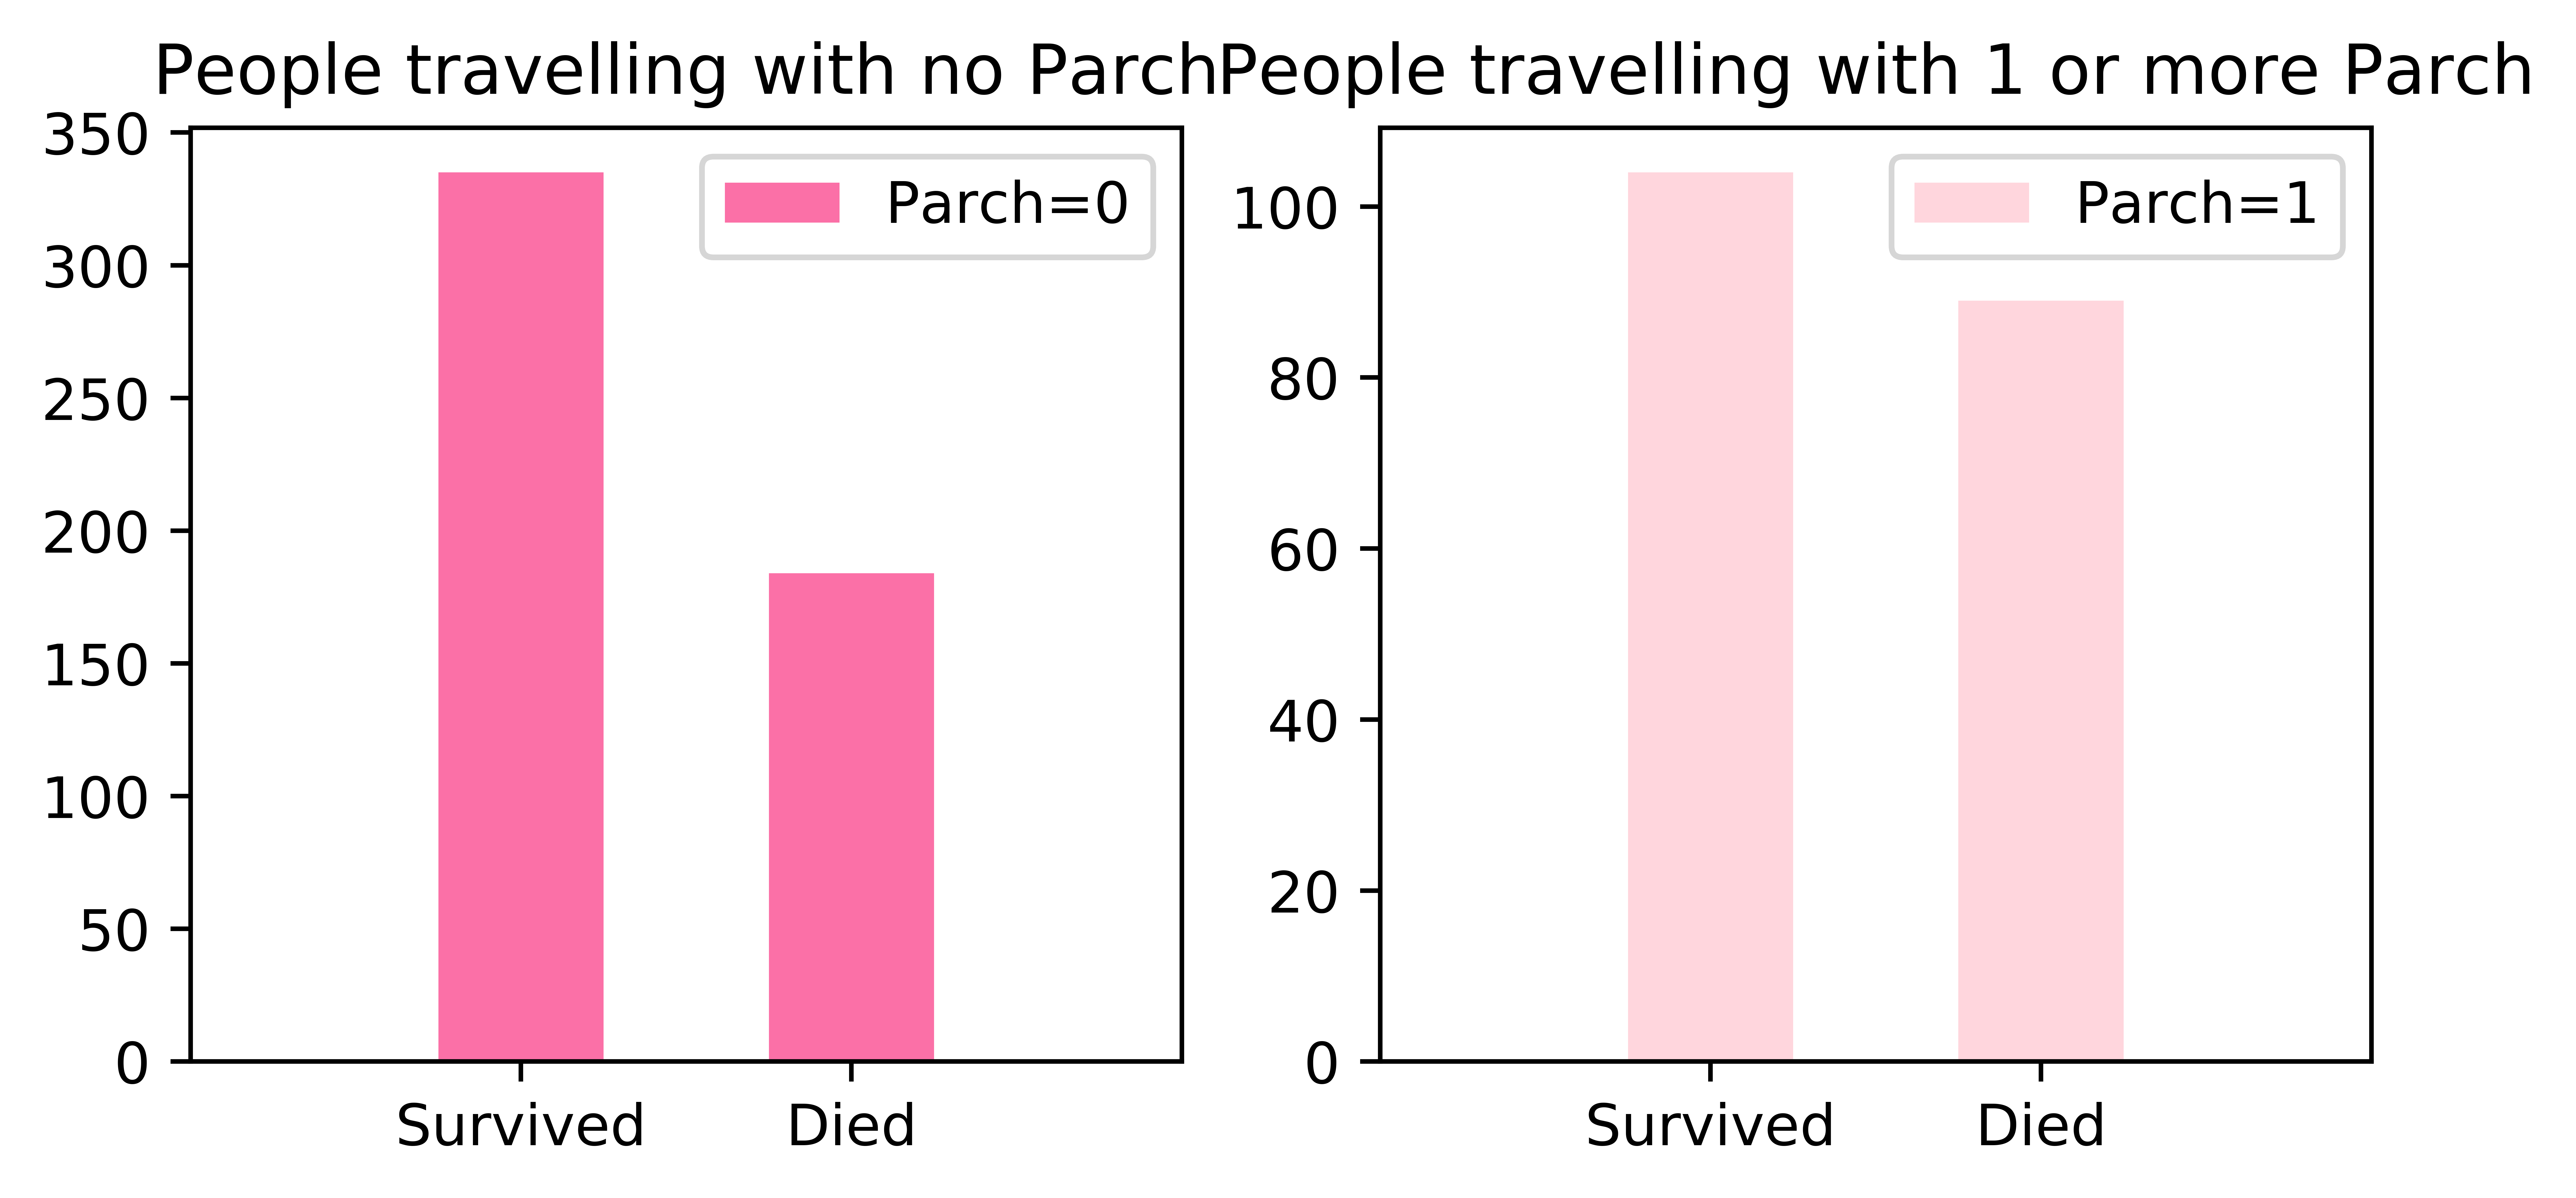

In [50]:
fig = plt.figure(figsize=(18,3), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(151)
first = df.Survived[df.Parch == 0].value_counts()
first.plot(kind='bar', label='Parch=0', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(first))
plt.title("People travelling with no Parch"); plt.legend(loc='best')

ax2=fig.add_subplot(152)
second = df.Survived[df.Parch >= 1].value_counts()
second.plot(kind='bar', label='Parch=1', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Survived", "Died"], rotation=0)
ax2.set_xlim(-1, len(second))
plt.title("People travelling with 1 or more Parch"); plt.legend(loc='best')


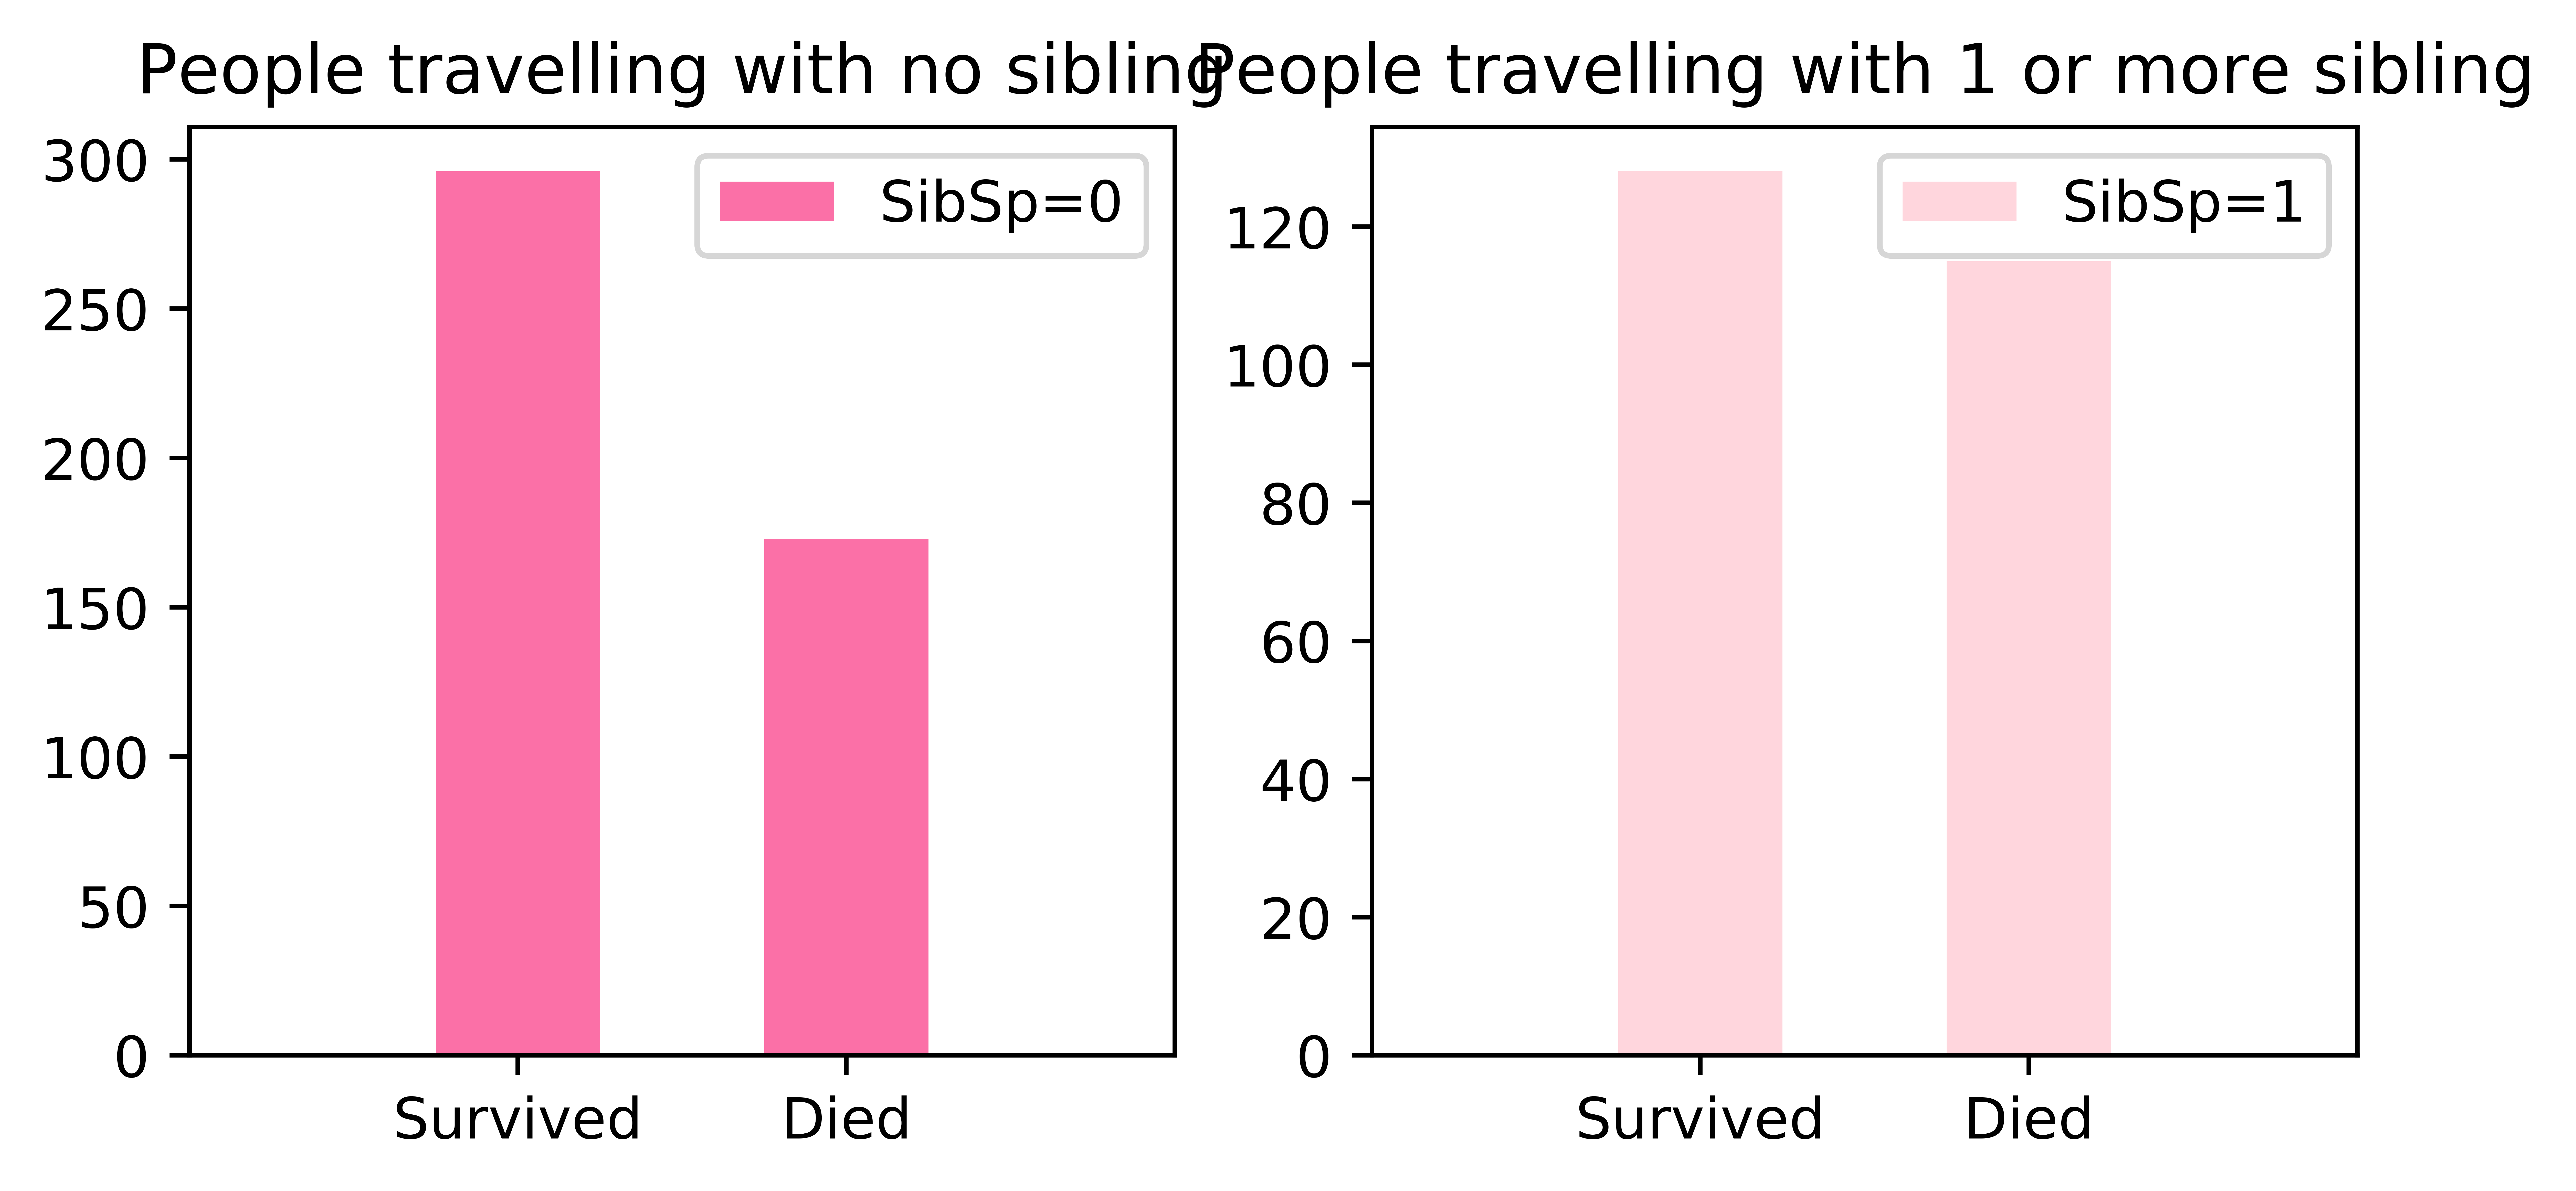

In [51]:
fig = plt.figure(figsize=(18,3), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(151)
first = df.Survived[df.SibSp == 0].value_counts()
first.plot(kind='bar', label='SibSp=0', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(first))
plt.title("People travelling with no sibling"); plt.legend(loc='best')

ax2=fig.add_subplot(152)
second = df.Survived[df.SibSp >= 1].value_counts()
second.plot(kind='bar', label='SibSp=1', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Survived", "Died"], rotation=0)
ax2.set_xlim(-1, len(second))
plt.title("People travelling with 1 or more sibling"); plt.legend(loc='best')


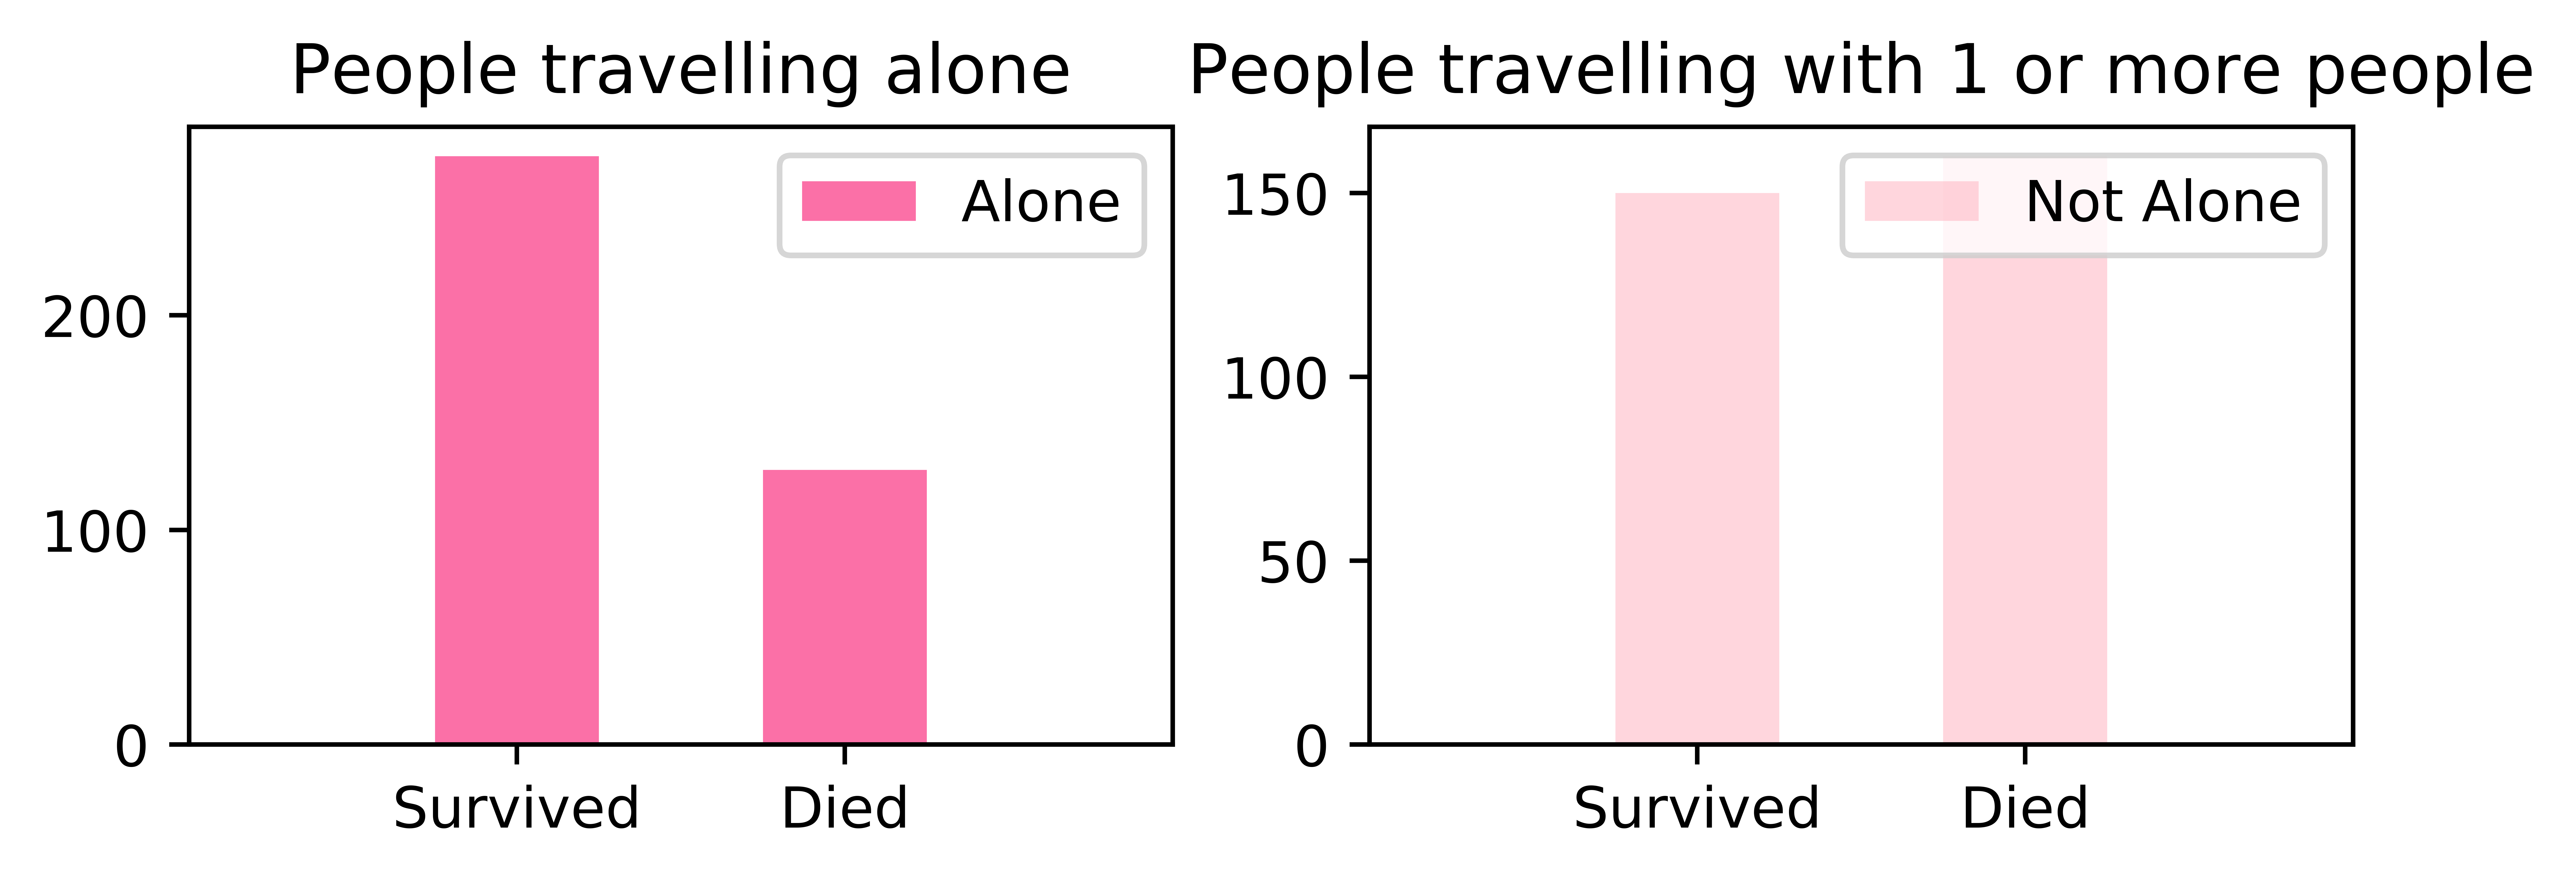

In [55]:
fig = plt.figure(figsize=(18,2), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(151)
first = df.Survived[df.SibSp == 0][df.Parch == 0].value_counts()
first.plot(kind='bar', label='Alone', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(first))
plt.title("People travelling alone"); plt.legend(loc='best')

ax2=fig.add_subplot(152)
second = df.Survived[df.SibSp != 0].value_counts() + df.Survived[df.Parch != 0].value_counts() - df.Survived[df.SibSp != 0][df.Parch != 0].value_counts()
second.plot(kind='bar', label='Not Alone', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Survived", "Died"], rotation=0)
ax2.set_xlim(-1, len(second))
plt.title("People travelling with 1 or more people"); plt.legend(loc='best')

A very interesting inference  -->
So we see people travelling alone have very better chance of survival. As shown in above graph if people are not travelling alone the chance of death is almost 50%, while for someone travelling alone only 1 in 3 died, So Survival rate is much higher if people were travelling alone.  